In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
infa = pd.read_csv('zomato.csv')
infa



,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.👌👍
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...
...,...,...,...
5474,5474,5,complain
5475,5475,5,it took 1 hour to assign valvet and thn prepar...
5476,5476,5,"took for an hour to prepare 3 khawsa, which in..."
5477,5477,1,"very very late, littrally did time pass and it..."


In [2]:
infa = infa[['review','rating']]
infa = infa.drop(infa[infa['rating']==4].index)
infa = infa.drop(infa[infa['rating']==2].index)
infa = infa.drop(infa[infa['rating']==3].index)
infa

,review,rating
0,nice,5
1,"best biryani , so supportive staff of outlet ,...",5
3,"worst biryani i have tasted in my life, half o...",1
4,all food is good and tasty . will order again ...,5
5,shandar zabardast zindabad .. good going bawar...,5
...,...,...
5474,complain,5
5475,it took 1 hour to assign valvet and thn prepar...,5
5476,"took for an hour to prepare 3 khawsa, which in...",5
5477,"very very late, littrally did time pass and it...",1


In [5]:
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def textprocess(text):
    text = text.lower()
    for i in string.punctuation:
        text = text.replace(i, ' ')
    tokens = re.split(' +', text)
    mass = []
    for i in tokens:
        if i not in stopwords.words('english'):
            mass.append(i)
    return mass

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
positive =infa[infa['rating']==5]['review']
positivewords = []
for i in positive:
    positivewords+=textprocess(i)

In [7]:
negative = infa[infa['rating']==1]['review']
negativewords = []
for i in negative:
    negativewords+=textprocess(i)


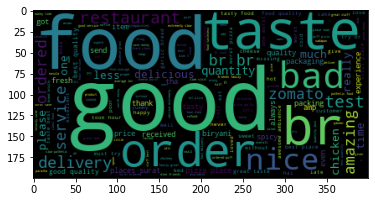

In [9]:
from wordcloud import WordCloud
poscloud = WordCloud().generate(' '.join(positivewords))
negcloud = WordCloud().generate(' '.join(negativewords))
plt.imshow(poscloud)


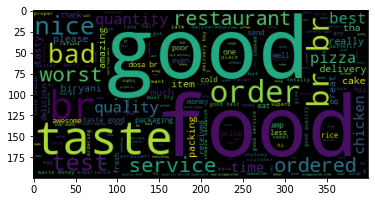

In [10]:
plt.imshow(negcloud)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
vectorer = TfidfVectorizer(max_df = 500, min_df = 10)
texts = [' '.join(textprocess(i)) for i in infa['review']]
infa2 = infa
infa2['review'] = texts
infa2

,review,rating
0,nice,5
1,best biryani supportive staff outlet personali...,5
3,worst biryani tasted life half biryani dustbin,1
4,food good tasty order lots explore bawarchi menu,5
5,shandar zabardast zindabad good going bawarchi...,5
...,...,...
5474,complain,5
5475,took 1 hour assign valvet thn prepare food lik...,5
5476,took hour prepare 3 khawsa real life gets prep...,5
5477,late littrally time pass items proper,1


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(infa2['review'], infa2['rating'], test_size = 0.2)

In [20]:
infa2['review']

0                                                    nice
1       best biryani supportive staff outlet personali...
3         worst biryani tasted life half biryani dustbin 
4       food good tasty order lots explore bawarchi menu 
5       shandar zabardast zindabad good going bawarchi...
                              ...                        
5474                                             complain
5475    took 1 hour assign valvet thn prepare food lik...
5476    took hour prepare 3 khawsa real life gets prep...
5477                late littrally time pass items proper
5478    taste stale give 5 pieces 50 rs please cheat o...
Name: review, Length: 4179, dtype: object

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
xtrain = vectorer.fit_transform(xtrain)
xtest = vectorer.transform(xtest)
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)
prediction = logistic.predict(xtest)
print(confusion_matrix(prediction, ytest))
print(classification_report(prediction, ytest))

[[112 104]
 [280 340]]
              precision    recall  f1-score   support

           1       0.29      0.52      0.37       216
           5       0.77      0.55      0.64       620

    accuracy                           0.54       836
   macro avg       0.53      0.53      0.50       836
weighted avg       0.64      0.54      0.57       836

